# Extract Data from yfinance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

df = yf.download('TSLA', 
                  start='2019-01-01', 
                  end='2024-4-29', 
                  progress=False)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-22,140.559998,144.440002,138.800003,142.050003,142.050003,107097600
2024-04-23,143.330002,147.259995,141.110001,144.679993,144.679993,124545100
2024-04-24,162.839996,167.970001,157.509995,162.130005,162.130005,181178000
2024-04-25,158.960007,170.880005,158.360001,170.179993,170.179993,126427500
2024-04-26,168.850006,172.119995,166.369995,168.289993,168.289993,109815700


In [2]:
df['Date'] = df.index  # Create a new column 'Date' with the index values
df.reset_index(drop=True, inplace=True) 

In [3]:
close_df = df[['Date', 'Close']]

# Create a Window Function

In [4]:
def window(df, column_name, k):
    df_copy = df.copy()  
    for i in range(1, k + 1):
        new_column_name = f"{column_name}-{i}"
        df_copy[new_column_name] = df_copy[column_name].shift(i)
    # Swap column names
    column_names = list(df_copy.columns)
    return df_copy.iloc[:, ::-1].drop(range(k))

window_size = 30
close_df = window(close_df, 'Close', window_size)
#close_df = close_df.drop(columns = ['Date'])
close_df.tail(10)

,Close-30,Close-29,Close-28,Close-27,Close-26,Close-25,Close-24,Close-23,Close-22,Close-21,...,Close-8,Close-7,Close-6,Close-5,Close-4,Close-3,Close-2,Close-1,Close,Date
1329,202.639999,188.139999,180.740005,176.539993,178.649994,175.339996,177.770004,177.539993,169.479996,162.500000,...,168.380005,171.110001,164.899994,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,2024-04-15
1330,188.139999,180.740005,176.539993,178.649994,175.339996,177.770004,177.539993,169.479996,162.500000,163.570007,...,171.110001,164.899994,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,2024-04-16
1331,180.740005,176.539993,178.649994,175.339996,177.770004,177.539993,169.479996,162.500000,163.570007,173.800003,...,164.899994,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,2024-04-17
1332,176.539993,178.649994,175.339996,177.770004,177.539993,169.479996,162.500000,163.570007,173.800003,171.320007,...,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,2024-04-18
1333,178.649994,175.339996,177.770004,177.539993,169.479996,162.500000,163.570007,173.800003,171.320007,175.660004,...,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,2024-04-19
1334,175.339996,177.770004,177.539993,169.479996,162.500000,163.570007,173.800003,171.320007,175.660004,172.820007,...,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,2024-04-22
1335,177.770004,177.539993,169.479996,162.500000,163.570007,173.800003,171.320007,175.660004,172.820007,170.830002,...,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,2024-04-23
1336,177.539993,169.479996,162.500000,163.570007,173.800003,171.320007,175.660004,172.820007,170.830002,172.630005,...,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,2024-04-24
1337,169.479996,162.500000,163.570007,173.800003,171.320007,175.660004,172.820007,170.830002,172.630005,177.669998,...,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,170.179993,2024-04-25
1338,162.500000,163.570007,173.800003,171.320007,175.660004,172.820007,170.830002,172.630005,177.669998,179.830002,...,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,170.179993,168.289993,2024-04-26


In [5]:
close_df_copy = close_df.copy()
close_df_copy = close_df_copy.drop('Date', axis = 1)

# Skewness

In [6]:
for col in close_df_copy.columns:
    print(col, close_df_copy[col].skew())

Close-30 -0.1868743447853712
Close-29 -0.188184642582749
Close-28 -0.18970285679033838
Close-27 -0.19118381783267804
Close-26 -0.1927742549171812
Close-25 -0.19430131048220894
Close-24 -0.19578591559412648
Close-23 -0.1973137428740892
Close-22 -0.19895027573699195
Close-21 -0.20061692597849026
Close-20 -0.20220510427881405
Close-19 -0.20378014369981726
Close-18 -0.20516623666972664
Close-17 -0.2065366274300618
Close-16 -0.20795940846666217
Close-15 -0.20922814682512614
Close-14 -0.21067560674461905
Close-13 -0.21221145767439728
Close-12 -0.21363119578352224
Close-11 -0.2151109787088712
Close-10 -0.21652325309389828
Close-9 -0.21771774844335448
Close-8 -0.21881769342823035
Close-7 -0.2198775521900562
Close-6 -0.22082199054176463
Close-5 -0.22169406918876342
Close-4 -0.22244145047553823
Close-3 -0.22323827765345497
Close-2 -0.224424525741506
Close-1 -0.22578502541277373
Close -0.22709470694017228


In [7]:
X = close_df_copy.drop(columns = 'Close')
y = close_df_copy['Close'] 

In [8]:
print(X.shape, y.shape)

(1309, 30) (1309,)


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.to_numpy().reshape(-1, 1))

In [10]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

In [11]:
print(X_train.shape, X_test.shape)

(1047, 30) (262, 30)


# Machine Learning

# Parametric Approch

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

lr = LinearRegression()
ridge = Ridge()
EN = ElasticNet()

In [66]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_mape(actual, forecast):
    
    if len(actual) != len(forecast):
        raise ValueError("Length of actual and forecast lists must be the same")
    
    absolute_errors = [abs(actual[i] - forecast[i]) for i in range(len(actual))]
    percentage_errors = [absolute_errors[i] / actual[i] * 100 for i in range(len(actual))]
    mape = sum(percentage_errors) / len(actual)
    return mape
    
def rearrange(y):
    y_lst = []
    for i in y:
        for j in i:
         y_lst.append(j)
    return y_lst
    
def non_parametric(model):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_pred_full_scaled = scaler_y.inverse_transform(train_pred.reshape(-1, 1))
    train_full_scaled = scaler_y.inverse_transform(y_train)
    
    y_TRAIN = train_full_scaled
    y_PRED_TRAIN = train_pred_full_scaled
    
    pred_full_scaled = scaler_y.inverse_transform(test_pred.reshape(-1, 1))
    test_full_scaled = scaler_y.inverse_transform(y_test)
    
    y_TEST = test_full_scaled
    y_PRED = pred_full_scaled
    
    y_TEST = y_TEST[-256:]
    y_PRED = y_PRED[-256:]
    
    mae = mean_absolute_error(y_TEST, y_PRED)
    RMSE = rmse(y_TEST, y_PRED)
    MAPE =  calculate_mape(y_TEST, y_PRED)
    r2 = r2_score(y_TEST, y_PRED)
    return mae, RMSE, MAPE, r2, model, rearrange(y_TRAIN), rearrange(y_PRED_TRAIN), rearrange(y_TEST), rearrange(y_PRED)


def visual(model, y_TRAIN, y_PRED_TRAIN, y_TEST, y_PRED):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        #pred = model.predict(X_train).flatten()
        train_results = pd.DataFrame(data={'Train Predictions':y_PRED_TRAIN, 'Actuals':y_TRAIN, 'Date': close_df['Date'].iloc[:train_size]})
        train_results.set_index('Date', inplace=True)

        plt.plot(train_results['Train Predictions'], label = 'Train Predictions')
        plt.plot(train_results['Actuals'], label = 'Train')
        plt.title('Training vs Predicitions')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        #pred = model.predict(X_test).flatten()
        test_results = pd.DataFrame(data={'Test Predictions':y_PRED, 'Actuals':y_TEST, 'Date': close_df['Date'].iloc[-256:]})
        test_results.set_index('Date', inplace = True)
        plt.plot(test_results['Test Predictions'], label = 'Test Predictions')
        plt.plot(test_results['Actuals'], label = 'Test')
        plt.title('Testing vs Predicitions')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Linear Regression

In [57]:
mae_lr, rmse_lr, mape_lr, r2_lr, model_lr, y_train_lr, y_train_pred_lg, y_test_lr, y_test_pred_lg = non_parametric(lr)
print("MAE:", mae_lr)
print("RMSE", rmse_lr)
print("MAPE", mape_lr)
print("R2", r2_lr)

MAE: 5.287762021167543
RMSE 6.956096796276648
MAPE [2.43663312]
R2 0.9658231689978357


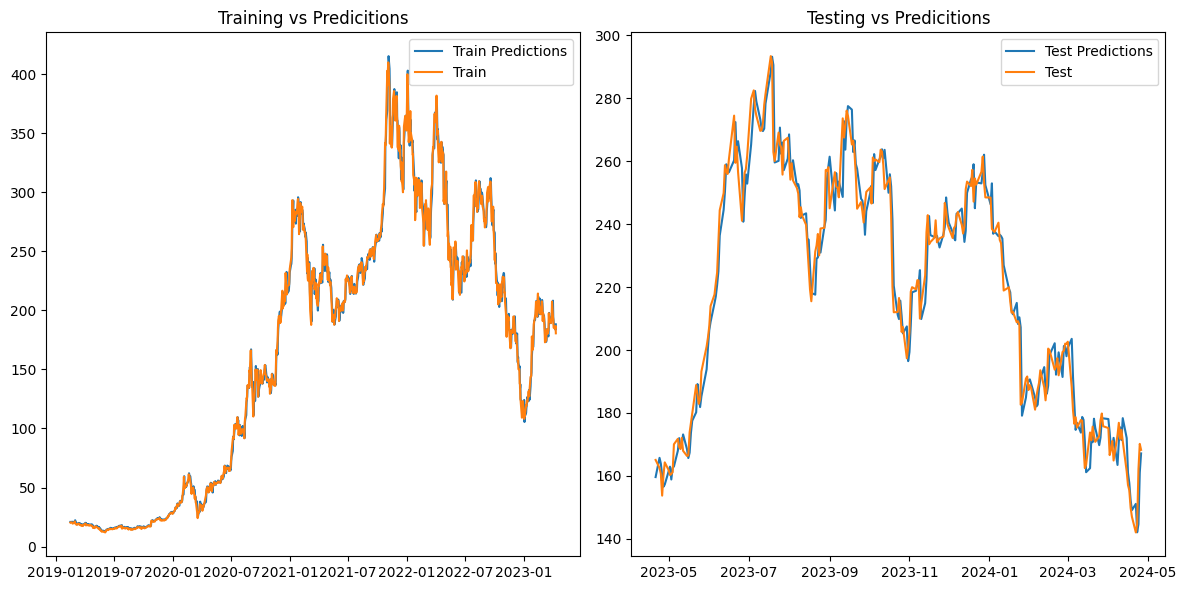

In [58]:
visual(model_lr,  y_train_lr, y_train_pred_lg, y_test_lr, y_test_pred_lg)

# Ridge Regression

In [49]:
mae_ridge, rmse_ridge, mape_ridge, r2_ridge, model_ridge, y_train_ridge, y_train_pred_ridge, y_test_ridge, y_test_pred_ridge = non_parametric(ridge)

print("MAE:", mae_ridge)
print("RMSE", rmse_ridge)
print("MAPE", mape_ridge)
print("R2", r2_ridge)

MAE: 6.359327289115047
RMSE 8.235692280598766
MAPE [2.93604247]
R2 0.9520928009668014


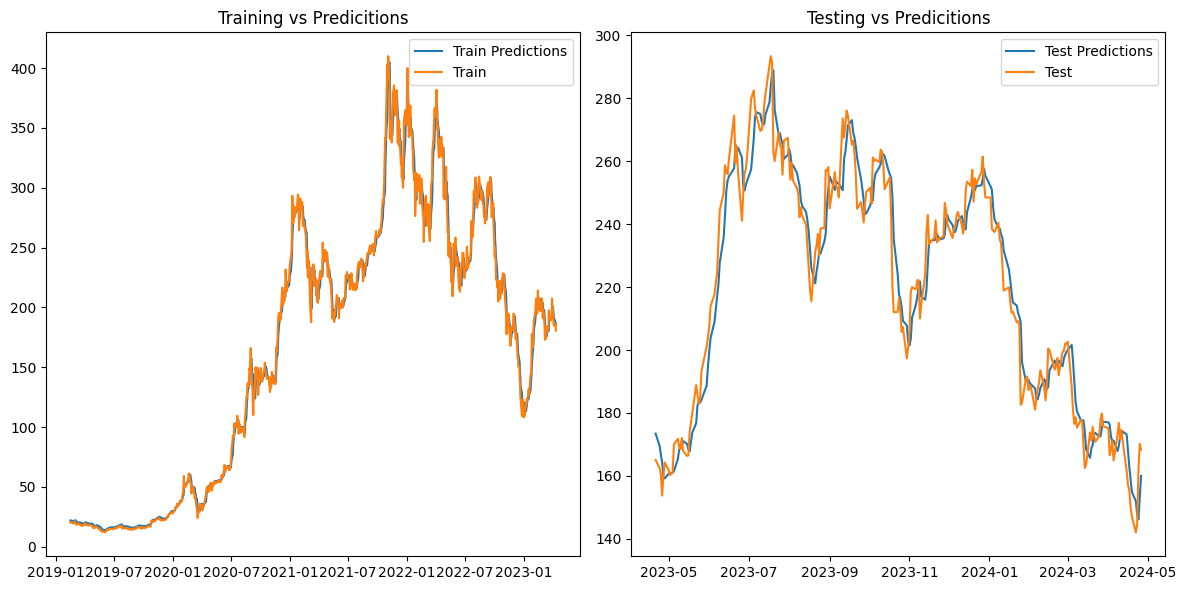

In [59]:
visual(model_ridge, y_train_ridge, y_train_pred_ridge, y_test_ridge, y_test_pred_ridge)

# Non-Parametric Approch

In [61]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
xgb = XGBRegressor()
lgm = LGBMRegressor(verbose=-1)
cat = CatBoostRegressor(silent=True)

# Gradient Boosting

In [67]:
mae_gb, rmse_gb, mape_gb, r2_gb, model_gb, y_train_gb, y_train_pred_gb, y_test_gb, y_test_pred_gb = non_parametric(gb)
print("MAE:", mae_gb)
print("RMSE", rmse_gb)
print("MAPE", mape_gb)
print("R2", r2_gb)

C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MAE: 5.720722542525542
RMSE 7.583026015308606
MAPE [2.67155103]
R2 0.9593850755839597


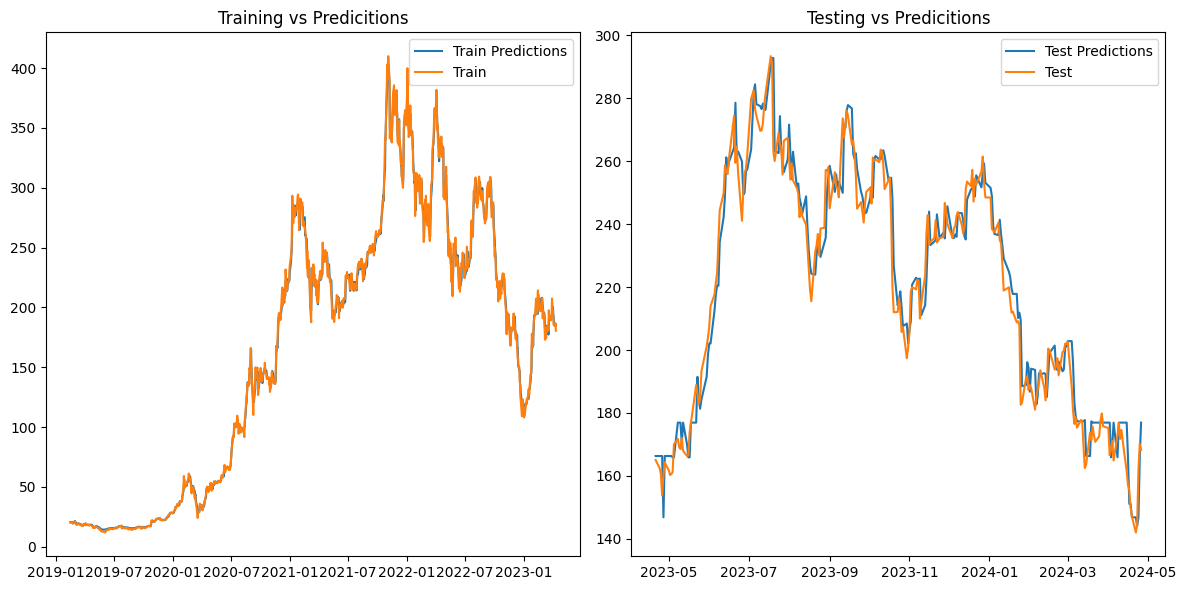

In [68]:
visual(model_gb, y_train_gb, y_train_pred_gb, y_test_gb, y_test_pred_gb)

# Random Forest

In [69]:
mae_rf, rmse_rf, mape_rf, r2_rf, model_rf, y_train_rf, y_train_pred_rf, y_test_rf, y_test_pred_rf = non_parametric(rf)
print("MAE:", mae_rf)
print("RMSE", rmse_rf)
print("MAPE", mape_rf)
print("R2", r2_rf)

C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 6.0393373993039114
RMSE 7.903193688269704
MAPE [2.81460383]
R2 0.9558830166257785


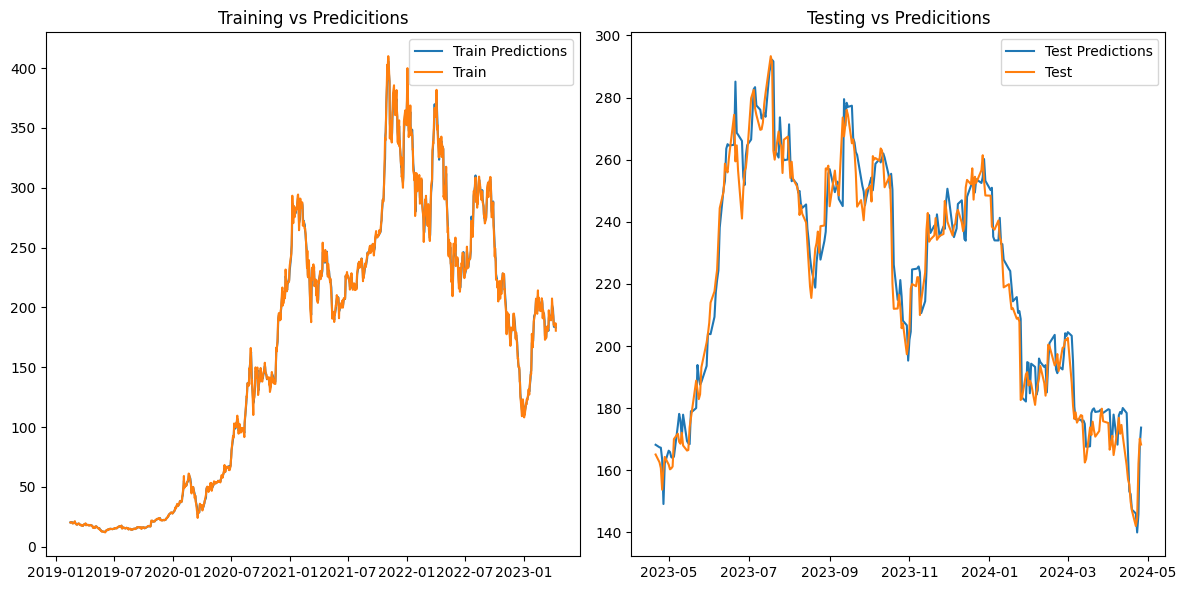

In [70]:
visual(model_rf, y_train_rf, y_train_pred_rf, y_test_rf, y_test_pred_rf)

# Extra Trees

In [71]:
mae_et, rmse_et, mape_et, r2_et, model_et, y_train_et, y_train_pred_et, y_test_et, y_test_pred_et = non_parametric(et)
print("MAE:", mae_et)
print("RMSE", rmse_et)
print("MAPE", mape_et)
print("R2", r2_et)

C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 6.014279154539104
RMSE 8.083994235838915
MAPE [2.789036]
R2 0.9538414085313857


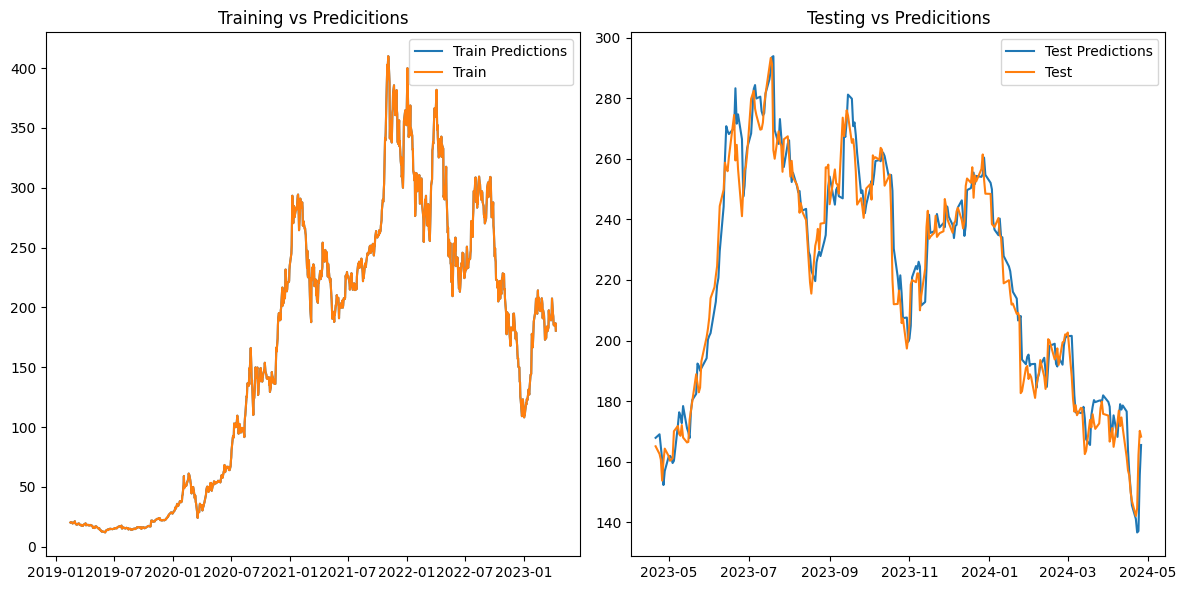

In [72]:
visual(model_et, y_train_et, y_train_pred_et, y_test_et, y_test_pred_et)

# XGB

In [73]:
mae_xgb, rmse_xgb, mape_xgb, r2_xgb, model_xgb, y_train_xgb, y_train_pred_xgb, y_test_xgb, y_test_pred_xgb = non_parametric(xgb)
print("MAE:", mae_xgb)
print("RMSE", rmse_xgb)
print("MAPE", mape_xgb)
print("R2", r2_xgb)

MAE: 7.018796622753142
RMSE 9.164107936994046
MAPE [3.27682332]
R2 0.940682758130582


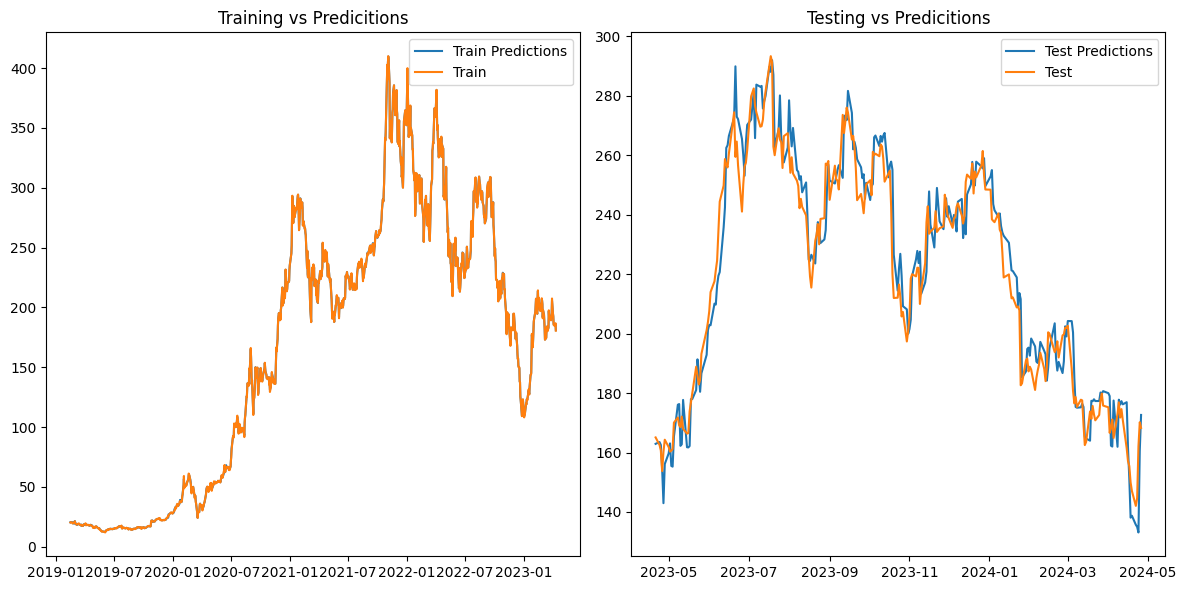

In [74]:
visual(model_xgb, y_train_xgb, y_train_pred_xgb, y_test_xgb, y_test_pred_xgb)

In [75]:
mae_lgm, rmse_lgm, mape_lgm, r2_lgm, model_lgm, y_train_lgm, y_train_pred_lgm, y_test_lgm, y_test_pred_lgm = non_parametric(lgm)
print("MAE:", mae_lgm)
print("RMSE", rmse_lgm)
print("MAPE", mape_lgm)
print("R2", r2_lgm)

MAE: 6.280063485075565
RMSE 8.297020216097303
MAPE [2.90405476]
R2 0.9513766525831302


C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


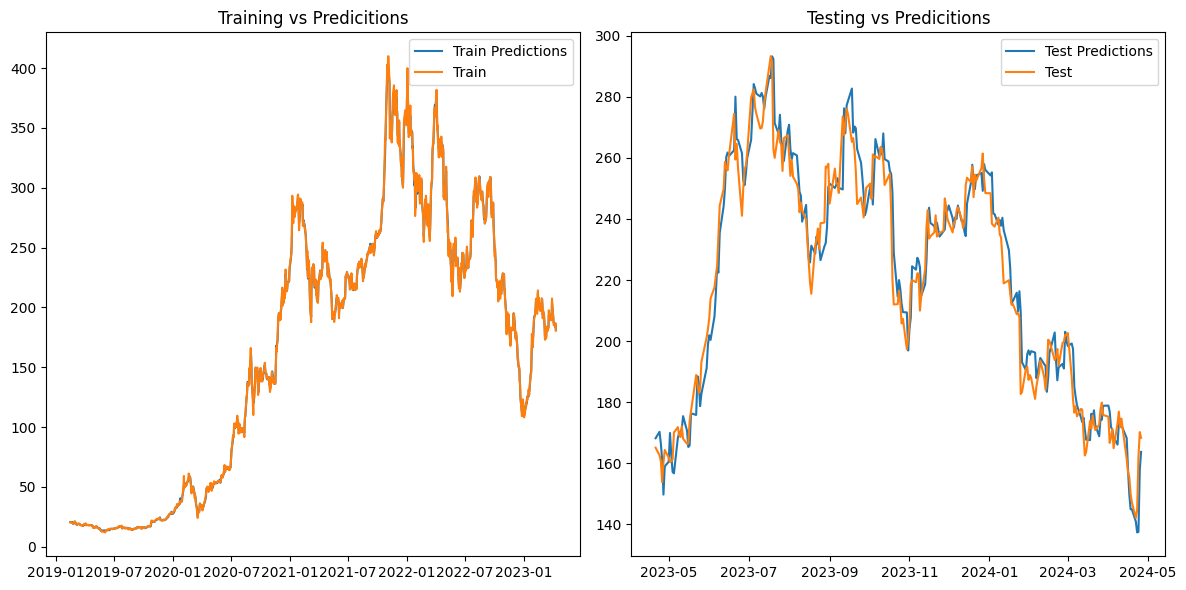

In [76]:
visual(model_lgm, y_train_lgm, y_train_pred_lgm, y_test_lgm, y_test_pred_lgm)

# CAT Boost

In [77]:
mae_cat, rmse_cat, mape_cat,r2_cat, model_cat, y_train_cat, y_train_pred_cat, y_test_cat, y_test_pred_cat = non_parametric(cat)
print("MAE:", mae_cat)
print("RMSE", rmse_cat)
print("MAPE", mape_cat)
print("R2", r2_cat)

MAE: 7.938098524967883
RMSE 10.23906933183639
MAPE [3.73779021]
R2 0.9259506032288616


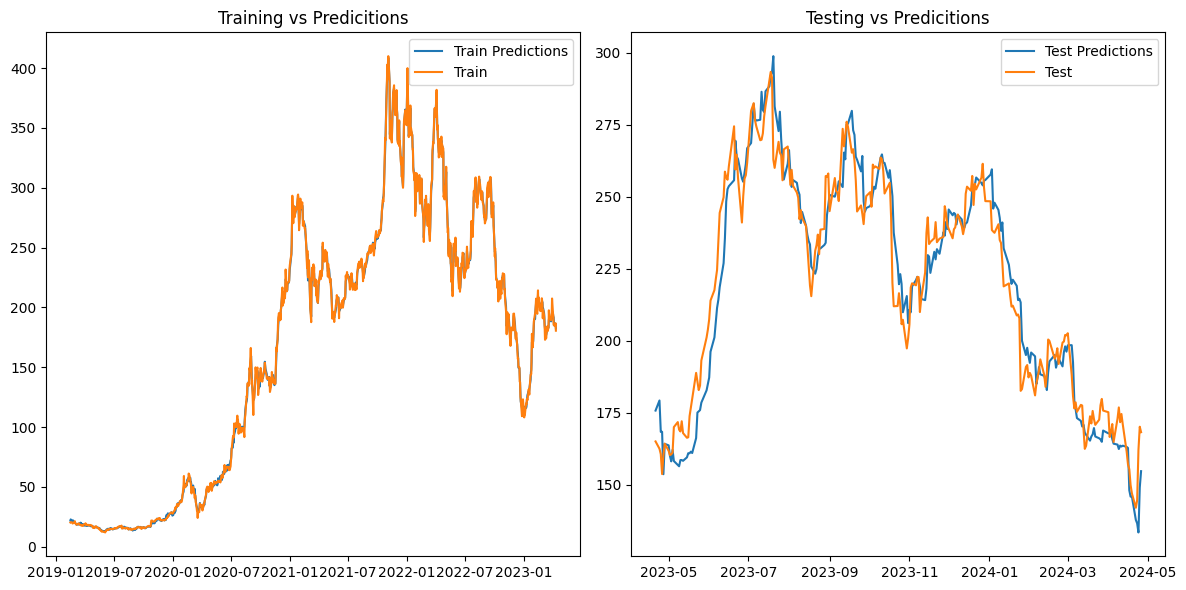

In [78]:
visual(model_cat, y_train_cat, y_train_pred_cat, y_test_cat, y_test_pred_cat)

In [88]:
model_df_non = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression','Gradient Boosting', 'Random Forest', 'Extra Tree', 'XGB', 'LGM', 'CAT'],
    'MAE': [mae_lr, mae_ridge, mae_gb, mae_rf, mae_et, mae_xgb, mae_lgm, mae_cat],
    'RMSE': [rmse_lr, rmse_ridge, rmse_gb, rmse_rf, rmse_et, rmse_xgb, rmse_lgm, rmse_cat],
    'MAPE': [mape_lr, mape_ridge, mape_gb, mape_rf, mape_et, mape_xgb, mape_lgm, mape_cat],
    'R2':[r2_lr, r2_ridge, r2_gb, r2_rf, r2_et, r2_xgb, r2_lgm, r2_cat]
})

model_df_non.sort_values(by = 'MAPE', ascending = True)

,Model,MAE,RMSE,MAPE,R2
0,Linear Regression,5.287762,6.956097,[2.436633123922665],0.965823
2,Gradient Boosting,5.720723,7.583026,[2.6715510285882136],0.959385
4,Extra Tree,6.014279,8.083994,[2.789035997256114],0.953841
3,Random Forest,6.039337,7.903194,[2.814603832083618],0.955883
6,LGM,6.280063,8.297020,[2.904054758415714],0.951377
1,Ridge Regression,6.359327,8.235692,[2.936042467325363],0.952093
5,XGB,7.018797,9.164108,[3.2768233197848313],0.940683
7,CAT,7.938099,10.239069,[3.737790211114884],0.925951


Best machine learning model is Ridge Regression for 30 days Window